In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [239]:
df = pd.read_csv("/content/Dataset/Dataset .csv")

# Show First 5 rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [241]:
# ----- Task 1 : Restaurant Ratings -----
df[['Aggregate rating', 'Votes']].head(10)

,Aggregate rating,Votes
0,4.8,314
1,4.5,591
2,4.4,270
3,4.9,365
4,4.8,229
5,4.4,336
6,4.0,520
7,4.2,677
8,4.9,621
9,4.8,532


In [242]:
df['Aggregate rating'].describe()

,Aggregate rating
count,9551.000000
mean,2.666370
std,1.516378
min,0.000000
25%,2.500000
50%,3.200000
75%,3.700000
max,4.900000


In [243]:
rating_bins = [0, 1, 2, 3, 4, 5]
rating_labels =  ['0-1', '1-2', '2-3', '3-4', '4-5']

df['Rating Range'] = pd.cut(
    df['Aggregate rating'],
    bins=rating_bins,
    labels=rating_labels,
    include_lowest=True
)

In [244]:
rating_distribution = df['Rating Range'].value_counts().sort_index()

print(rating_distribution)

Rating Range
0-1    2148
1-2      10
2-3    1891
3-4    4388
4-5    1114
Name: count, dtype: int64


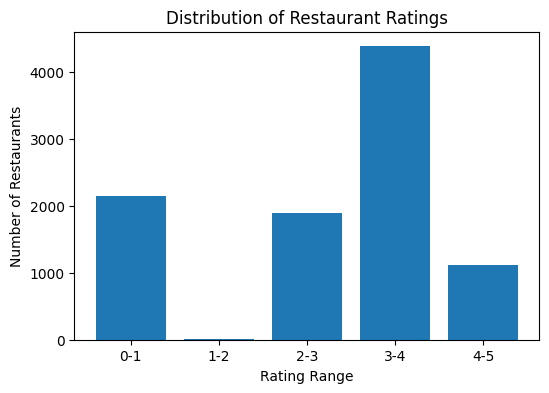

In [245]:
plt.figure(figsize=(6,4))
plt.bar(rating_distribution.index, rating_distribution.values)
plt.xlabel("Rating Range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()


In [246]:
most_common_range = rating_distribution.idxmax()
most_common_range


'3-4'

In [247]:
average_votes = df['Votes'].mean()

print("\nCalculate the average number of votes received by restaurants.")
average_votes



Calculate the average number of votes received by restaurants.


np.float64(156.909747670401)

In [248]:
votes_by_rating = df.groupby('Rating Range')['Votes'].mean()
votes_by_rating


/tmp/ipython-input-3060346087.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votes_by_rating = df.groupby('Rating Range')['Votes'].mean()


,Votes
Rating Range,
0-1,0.870112
1-2,144.200000
2-3,38.991010
3-4,162.152005
4-5,637.413824


In [249]:
print("\nIn task 1, I analyzed the distribution of aggregate ratings by categorizing them into ranges. I identified the most common rating range and calculated the average number of votes to understand overall customer engagement.”")
# Key Insights
# Most restaurants fall within the mid to high rating ranges, indicating generally positive customer feedback.
# Higher-rated restaurants tend to receive significantly more customer votes, reflecting greater popularity and trust


In task 1, I analyzed the distribution of aggregate ratings by categorizing them into ranges. I identified the most common rating range and calculated the average number of votes to understand overall customer engagement.”


In [250]:
# ----- Task 2 : Cuisine Combination -----
df['Cuisines'].head(10)

,Cuisines
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
5,Chinese
6,"Asian, European"
7,"Seafood, Filipino, Asian, European"
8,"European, Asian, Indian"
9,Filipino


In [251]:
df_cuisines = df.dropna(subset=['Cuisines']).copy()

# print(df_cuisines)

In [252]:
df_cuisines['Cuisines Combination'] = (
    df_cuisines['Cuisines']
    .str.split(', ')
    .apply(lambda x: ', '.join(sorted(x)))
)


In [253]:
combo_counts = df_cuisines['Cuisines Combination'].value_counts()

print("\nIdentify the most common combinations of cuisines")
combo_counts.head(10)


Identify the most common combinations of cuisines


,count
Cuisines Combination,
North Indian,936
"Chinese, North Indian",616
"Mughlai, North Indian",394
Fast Food,354
Chinese,354
"Chinese, Mughlai, North Indian",306
Cafe,299
Bakery,218
"Bakery, Desserts",181


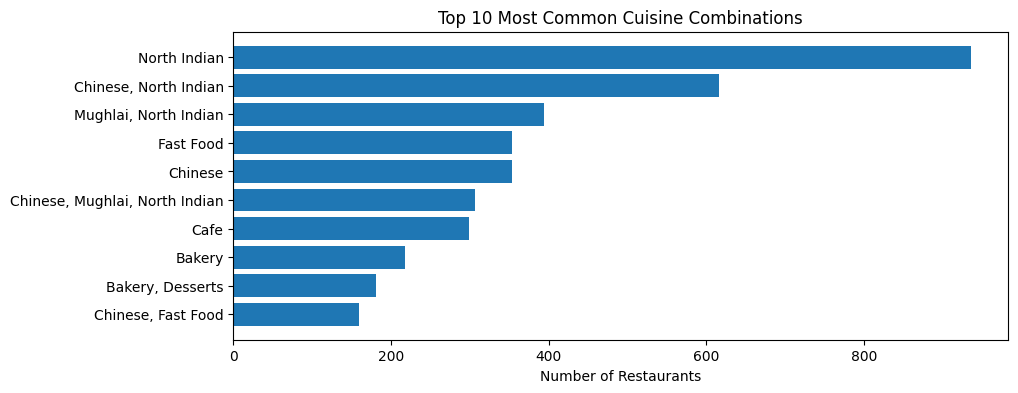

In [254]:
top_10_combos = combo_counts.head(10)

plt.figure(figsize=(10,4))
plt.barh(top_10_combos.index, top_10_combos.values)
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Most Common Cuisine Combinations")
plt.gca().invert_yaxis()
plt.show()


In [255]:
combo_ratings = (
    df_cuisines
    .groupby('Cuisines Combination')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

print("\nCalculate the average aggregate rating for each cuisine combination.")
combo_ratings.head(10)



Calculate the average aggregate rating for each cuisine combination.


,Aggregate rating
Cuisines Combination,
World Cuisine,4.9
"American, BBQ, Sandwich",4.9
"American, Healthy Food, Mexican",4.9
"American, Coffee and Tea",4.9
"American, Caribbean, Seafood",4.9
"Contemporary, European",4.9
"European, German",4.9
"American, Sandwich, Tea",4.9
"Bar Food, Burger, Steak",4.9


In [256]:
combo_stats = df_cuisines.groupby('Cuisines Combination').agg(
    Avg_Rating=('Aggregate rating', 'mean'),
    Restaurant_Count=('Aggregate rating', 'count')
)

combo_stats = combo_stats[combo_stats['Restaurant_Count'] >= 20]
combo_stats.sort_values(by='Avg_Rating', ascending=False).head(10)


,Avg_Rating,Restaurant_Count
Cuisines Combination,,
"Japanese, Sushi",4.060000,20
American,3.667742,31
Italian,3.657407,54
"Italian, Pizza",3.651163,43
Mexican,3.636111,36
"Chinese, Continental, Italian, North Indian",3.605405,37
Continental,3.566667,21
"Cafe, Tea",3.409524,21
"American, Fast Food",3.386364,22


In [257]:
# Key Insights
# Multi-cuisine combinations are more common than single-cuisine offerings, suggesting customer demand for variety.
# Certain cuisine combinations consistently achieve higher average ratings, indicating successful pairing of complementary cuisines.

In [258]:
# ----- Task 3 : Geographic Analysis -----

df[['Latitude', 'Longitude']].head()

,Latitude,Longitude
0,14.565443,121.027535
1,14.553708,121.014101
2,14.581404,121.056831
3,14.585318,121.056475
4,14.584450,121.057508


In [259]:
df_geo = df.dropna(subset=['Latitude', 'Longitude'])

In [260]:
# I validated geographic coordinates by checking latitude and longitude
# ranges to ensure values were within valid bounds before plotting
# spatial visualization

print(df_geo[['Latitude', 'Longitude']].describe())


          Latitude    Longitude
count  9551.000000  9551.000000
mean     25.854381    64.126574
std      11.007935    41.467058
min     -41.330428  -157.948486
25%      28.478713    77.081343
50%      28.570469    77.191964
75%      28.642758    77.282006
max      55.976980   174.832089


In [261]:
# Installing Folium
!pip install folium


In [262]:
# Creating base map
# Claculate canter of map (latitude & longitude)
map_center = [
    df_geo['Latitude'].mean(),
    df_geo['Longitude'].mean()
]

# print(map_center)

rest_map = folium.Map(
    location=map_center,
    zoom_start=5
)
rest_map

In [263]:
# Plot restaurant locations

sample_df = df_geo.sample(n=1000, random_state=42)

In [264]:
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(rest_map)

rest_map
# Plot the locations of restaurants on a
# map using longitude and latitude coordinates.


In [265]:


heat_data = df_geo[['Latitude', 'Longitude']].values.tolist()

heat_map = folium.Map(location=map_center, zoom_start=5)
HeatMap(heat_data, radius=8).add_to(heat_map)

heat_map
# I plotted restaurant locations using latitude and longitude
# and used heat maps to identify geographic clusters.
# The visualization shows strong concentration in urban regions,
# indicating higher restaurant density in metropolitan area.


In [266]:
# Key Insights
# Restaurants are heavily clustered in major metropolitan and urban areas.
# Geographic clustering highlights the influence of population density and economic activity on restaurant locations.

In [267]:
# ----- task 4 : Restaurant Chains -----
df['Restaurant Name'].head()


,Restaurant Name
0,Le Petit Souffle
1,Izakaya Kikufuji
2,Heat - Edsa Shangri-La
3,Ooma
4,Sambo Kojin


In [268]:
rest_counts = df['Restaurant Name'].value_counts()
print(rest_counts.head(10))

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [269]:
# Identify if there are any restaurant chains present
chain = rest_counts[rest_counts > 1]
print(chain.head(10))

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [270]:
# How many unique chain brands exist in the datase
chain.shape[0]

734

In [271]:
# Creating a DataFrame with only chain restaurants
df_chains = df[df['Restaurant Name'].isin(chain.index)]

print(df_chains.head(2))

    Restaurant ID   Restaurant Name  Country Code              City  \
5        18189371      Din Tai Fung           162  Mandaluyong City   
10        6309903  Silantro Fil-Mex           162        Pasig City   

                                              Address  \
5   Ground Floor, Mega Fashion Hall, SM Megamall, ...   
10       75 East Capitol Drive, Kapitolyo, Pasig City   

                                  Locality  \
5   SM Megamall, Ortigas, Mandaluyong City   
10                               Kapitolyo   

                                     Locality Verbose   Longitude   Latitude  \
5   SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056314  14.583764   
10                              Kapitolyo, Pasig City  121.057916  14.567689   

             Cuisines  ...  Has Table booking Has Online delivery  \
5             Chinese  ...                 No                  No   
10  Filipino, Mexican  ...                 No                  No   

   Is delivering now Switc

In [272]:
# Analyze ratings of restaurant chains
chain_ratings = (
    df_chains
    .groupby('Restaurant Name')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

print(chain_ratings.head(10))


Restaurant Name
Talaga Sampireun             4.900
Silantro Fil-Mex             4.850
AB's Absolute Barbecues      4.850
AB's - Absolute Barbecues    4.825
Naturals Ice Cream           4.800
Gymkhana                     4.700
The Cheesecake Factory       4.650
Garota de Ipanema            4.600
Dishoom                      4.600
Chili's                      4.580
Name: Aggregate rating, dtype: float64


In [273]:
# Analyze popularity (votes) of restaurant chains
chain_votes = (
    df_chains
    .groupby('Restaurant Name')['Votes']
    .mean()
    .sort_values(ascending=False)
)

print(chain_votes.head(10))


Restaurant Name
Truffles                     4841.000000
Joey's Pizza                 3903.500000
AB's - Absolute Barbecues    3350.000000
Big Chill                    2713.250000
Big Yellow Door              2503.666667
Out Of The Box               2450.000000
Saravana Bhavan              2412.666667
Olive Bistro                 1854.000000
Talaga Sampireun             1838.000000
SpiceKlub                    1825.500000
Name: Votes, dtype: float64


In [274]:
chain_summary = df_chains.groupby('Restaurant Name').agg(
    Average_Rating=('Aggregate rating', 'mean'),
    Average_Votes=('Votes', 'mean'),
    Outlet_Count=('Restaurant Name', 'count')
)

chain_summary = chain_summary.sort_values(
    by='Average_Rating',
    ascending=False
)

print(chain_summary.head(10))


                           Average_Rating  Average_Votes  Outlet_Count
Restaurant Name                                                       
Talaga Sampireun                    4.900         1838.0             3
Silantro Fil-Mex                    4.850          682.0             2
AB's Absolute Barbecues             4.850         1575.5             2
AB's - Absolute Barbecues           4.825         3350.0             4
Naturals Ice Cream                  4.800         1547.0             2
Gymkhana                            4.700          164.0             2
The Cheesecake Factory              4.650         1505.0             2
Garota de Ipanema                   4.600           29.5             2
Dishoom                             4.600          634.5             2
Chili's                             4.580         1631.2             5


In [275]:
# Filtering meaningful chains
significant_chains = chain_summary[chain_summary['Outlet_Count'] >= 5]
print(significant_chains.head(10))


                 Average_Rating  Average_Votes  Outlet_Count
Restaurant Name                                             
Chili's                4.580000    1631.200000             5
Farzi Cafe             4.366667    1683.000000             6
Barbeque Nation        4.353846    1082.384615            26
Punjab Grill           4.340000    1084.800000             5
Mocha                  4.185714     444.428571             7
Happy Hakka            3.860000     294.200000             5
Texas Roadhouse        3.860000     156.600000             5
TGI Friday's           3.850000     726.166667             6
L'Opera                3.820000     209.200000             5
Starbucks              3.805556     396.611111            18


In [276]:
# I identified restaurant chains by detecting repeated restaurant names.
# I then analyzed their average ratings, customer votes,
# and outlet count to compare quality, popularity,
# and scale across chains.


In [277]:
# Key Insights
# he dataset contains several restaurant chains with multiple outlets across different locations.
# Large restaurant chains tend to receive higher customer engagement in terms of votes.

In [278]:
# Conclusion
# This analysis explored restaurant data to identify patterns in cuisines, pricing, delivery services, ratings, geographic distribution, and restaurant chains.
# The insights derived can help understand customer preferences and restaurant market trends.